In [21]:
from gsd_lib import GSD, MinimalPackingGenerator
import numpy as np
from sigfig import round
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib widget


In [27]:
def round_to_n_significant_digits(value, n=3):
    if value == 0:
        return 0
    return np.round(value, -int(np.floor(np.log10(abs(value)))) + (n - 1))


In [30]:
# Read the CSV file with the special structure
df = pd.read_csv("zeraati-shamsabadi_study_2025.csv")

# Get the headers from row 1
headers = df.columns.tolist()
print("Headers:", headers)

# Get the dimension headers from row 2 (first data row)
dimensions = df.iloc[0].tolist()
print("Dimensions:", dimensions)

# Extract the actual data (skip the dimension row)
data = df.iloc[1:].reset_index(drop=True)

# Create a dictionary to store datasets
datasets = {}

# Process each dataset (every 2 columns)
for i in range(0, len(headers), 2):
    if i + 1 < len(headers):
        dataset_name = (
            headers[i]
            if headers[i] and not headers[i].startswith("Unnamed")
            else f"dataset_{i // 2 + 1}"
        )

        # Get X and Y columns
        x_col = data.iloc[:, i]
        y_col = data.iloc[:, i + 1]

        # Remove NaN values
        mask = ~(pd.isna(x_col) | pd.isna(y_col))
        x_clean = x_col[mask].astype(float).values
        y_clean = y_col[mask].astype(float).values

        datasets[dataset_name] = {"x": x_clean, "y": y_clean}

# round all the values in datasets to 3 significant figures
for name, data in datasets.items():
    data['x'] = np.array([round_to_n_significant_digits(x, 2) for x in data['x']])
    data['y'] = np.array([round_to_n_significant_digits(y, 2) for y in data['y']])

# Display available datasets
print("\nAvailable datasets:")
for name, data in datasets.items():
    print(f"  {name}: {len(data['x'])} data points")
    print(f"    X range: {data['x'].min():.3f} to {data['x'].max():.3f}")
    print(f"    Y range: {data['y'].min():.3f} to {data['y'].max():.3f}")


Headers: ['Actual_sand', 'Unnamed: 1', 'SF_5', 'Unnamed: 3', 'SF_10', 'Unnamed: 5', 'SF_15', 'Unnamed: 7', 'SF_20', 'Unnamed: 9']
Dimensions: ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y']

Available datasets:
  Actual_sand: 7 data points
    X range: 0.076 to 2.400
    Y range: 3.900 to 100.000
  SF_5: 7 data points
    X range: 0.380 to 12.000
    Y range: 3.900 to 100.000
  SF_10: 7 data points
    X range: 0.740 to 26.000
    Y range: 3.900 to 100.000
  SF_15: 7 data points
    X range: 1.100 to 39.000
    Y range: 3.900 to 100.000
  SF_20: 7 data points
    X range: 1.500 to 49.000
    Y range: 3.900 to 100.000


3.9 0.0
5.0 3.9
15.0 5.0
60.0 15.0
81.0 60.0
93.0 81.0
100.0 93.0
3.9 0.0
5.0 3.9
15.0 5.0
60.0 15.0
81.0 60.0
93.0 81.0
100.0 93.0
3.9 0.0
5.2 3.9
15.0 5.2
60.0 15.0
82.0 60.0
93.0 82.0
100.0 93.0
3.9 0.0
5.0 3.9
15.0 5.0
60.0 15.0
81.0 60.0
94.0 81.0
100.0 94.0
3.9 0.0
5.0 3.9
15.0 5.0
60.0 15.0
81.0 60.0
93.0 81.0
100.0 93.0


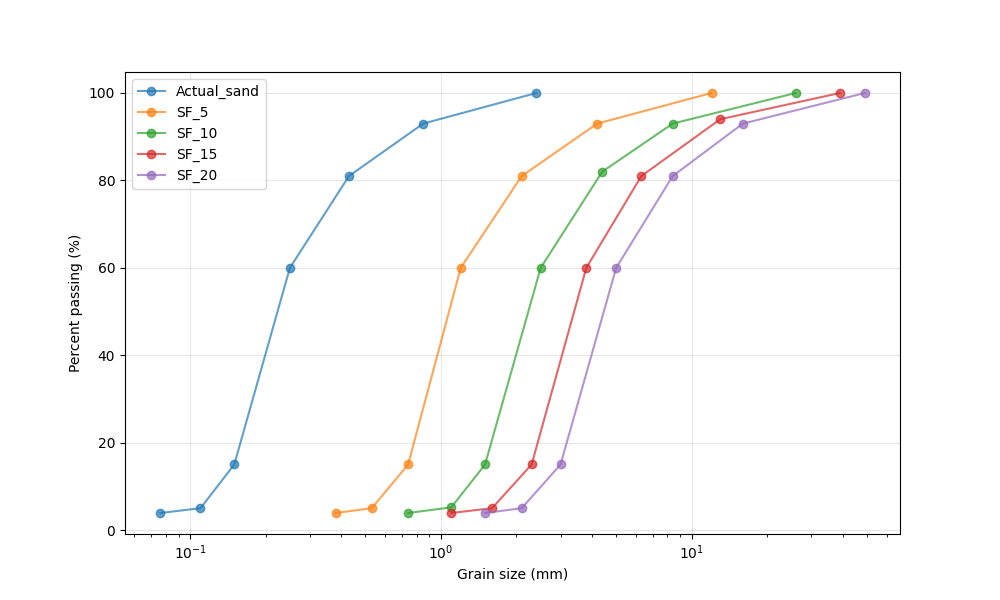

In [ ]:
# Example: Access the first dataset
dataset_name = list(datasets.keys())[0]
x_data = datasets[dataset_name]["x"]
y_data = datasets[dataset_name]["y"]

# Or access by specific name if you know it
# x_data = datasets['dataset1']['x']
# y_data = datasets['dataset1']['y']

tol = 1e-3

gsd_list = []
mps_list = []
# Plot all datasets
figure, ax = plt.subplots(figsize=(10, 6))
for name, data in datasets.items():
    ax.plot(data["x"], data["y"], "o-", label=name, alpha=0.7)  
    sizes = data["x"]
    sizes = np.insert(sizes, 0, sizes[0]/2)  # Add a point at 10x the last size
    masses = data["y"]
    masses = np.insert(masses, 0, 0)  # Add a point at 10x the last mass
    retained = np.zeros(len(sizes))
    for i in range(len(masses) - 1):
        retained[i] = masses[i + 1] - masses[i]

    masses = retained
    g = GSD(sizes=sizes, masses=masses)
    mps = MinimalPackingGenerator(
        g, x_n_factor=0.01, tol=tol, flex=True, density=1.0
    )
    gsd_list.append(g)
    mps_list.append(mps)


ax.set_xlabel("Grain size (mm)")
ax.set_ylabel("Percent passing (%)")
ax.set_xscale("log")
ax.legend()
ax.grid(True, alpha=0.3)


(0.055, 100)

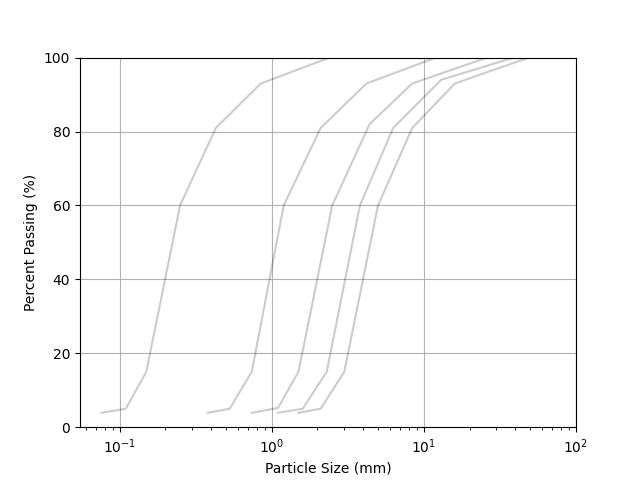

In [51]:
# Plot the grain size distributions
plt.close("all")
fig, ax = plt.subplots()
for gsd in gsd_list:
    ax.plot(gsd.sizes[1:], 100 * gsd.percent_passing[1:], color="k", alpha=0.2)
ax.set_xscale("log")
ax.grid()  # (True, which='both', axis='both')
ax.set_xlabel("Particle Size (mm)")
ax.set_ylabel("Percent Passing (%)")
ax.set_ylim(0, 100)
ax.set_xlim(0.055, 100)


In [55]:
for i in range(len(gsd_list)):
    gsd = gsd_list[i]
    mps = mps_list[i]
    print(f"\nDataset {i + 1}:")
    print(f"  Sizes: {gsd.sizes}")
    print(f"  Masses: {gsd.masses}")
    print(f"  Minimal Packing Sizes: {mps.mps.sizes}")
    print(f"  Minimal Packing Masses: {sum(mps.qs[-1])}")


Dataset 1:
  Sizes: [0.038 0.076 0.11  0.15  0.25  0.43  0.85  2.4  ]
  Masses: [ 3.9  1.1 10.  45.  21.  12.   7.   0. ]
  Minimal Packing Sizes: [0.07599575 0.10978299 0.14989604 0.24992027 0.42690131 0.82215078
 0.8655    ]
  Minimal Packing Masses: 1470

Dataset 2:
  Sizes: [ 0.19  0.38  0.53  0.74  1.2   2.1   4.2  12.  ]
  Masses: [ 3.9  1.1 10.  45.  21.  12.   7.   0. ]
  Minimal Packing Sizes: [0.37999154 0.52923225 0.73911981 1.1989967  2.08268417 4.06373317
 4.278     ]
  Minimal Packing Masses: 1476

Dataset 3:
  Sizes: [ 0.37  0.74  1.1   1.5   2.5   4.4   8.4  26.  ]
  Masses: [ 3.9  1.3  9.8 45.  22.  11.   7.   0. ]
  Minimal Packing Sizes: [0.73977625 1.09589734 1.49931777 2.49841827 4.35501082 7.91357985
 8.576     ]
  Minimal Packing Masses: 1506

Dataset 4:
  Sizes: [ 0.55  1.1   1.6   2.3   3.8   6.3  13.   39.  ]
  Masses: [ 3.9  1.1 10.  45.  21.  13.   6.   0. ]
  Minimal Packing Sizes: [ 1.09986674  1.5967156   2.29849262  3.79868881  6.27665453 11.89689987
 1

In [57]:
np.trapezoid([1, 3, 3], x=[0, 1, 2])


np.float64(5.0)